# $$Q2$$

In [1]:
%matplotlib inline

import itertools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

mpl.rc('font', size=14)

In [2]:
def confusionMatrix(X_train, X_validation, Y_train, Y_validation):
    normalize = True

    # Make predictions on validation dataset.
    for name, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_validation)
        cm = confusion_matrix(Y_validation, predictions)

        print(name)
        print(accuracy_score(Y_validation, predictions))
        print(confusion_matrix(Y_validation, predictions))
        print(classification_report(Y_validation, predictions))


        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        fig, ax = plt.subplots(1,1, figsize=(6,6))
        img = ax.imshow(cm,
                        interpolation='nearest',
                        cmap='Blues')        
#         ax.set(title=name)
        ax.set(title = name, aspect='equal',
               xlabel='predicted label',
               xticks=np.arange(cm.shape[1]),
               xticklabels=['background', 'signal'],
               ylabel='true label',
               yticks=np.arange(cm.shape[1]),
               yticklabels=['background', 'signal'])
        fig.colorbar(img, shrink=0.675, label = 'correct label probability')
        plt.xticks(rotation=45)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment='center',
                     color='white' if cm[i, j] > thresh else 'black')
        fig.tight_layout()

In [3]:
def ROC_Prec_Curve(X_train, X_validation, Y_train, Y_validation):
    fig, axes = plt.subplots(1, 2, figsize = (12,5), sharex = True, sharey = True)
    for name, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict_proba(X_validation)[:,1]
        fpr, tpr, thresholds = roc_curve(Y_validation, predictions)
        pre, rec, _ = precision_recall_curve(Y_validation, predictions)

        ax = axes[0]
        ax.plot(fpr, tpr, lw = 2, label = name)
        ax.plot((0,1), (0,1), 'k--', alpha = 0.3)
        ax.grid(ls = ':')
        ax.set(xlim=(-0.01,1.01), xlabel='FPR',
           ylim=(-0.01,1.01), ylabel='recall',
           title='ROC Curve'.format(auc(fpr, tpr)),
           aspect='equal')
        ax.legend()

        ax = axes[1]
        ax.plot(rec, pre, lw=2, label = name)
        f_scores = np.linspace(0.1, 0.9, num=5)
        lines = []
        labels = []

        ax.grid(ls=':')
        ax.set(xlabel='recall',
               ylabel='precision',
               title='Average precision',
              # = {:.3f} ({:s})\n'.format(average_precision_score(Y_validation, predictions), name),
               aspect='equal')
        ax.legend()

    fig.tight_layout()

### a)

In [4]:
fileName_a = 'HW08Data_Reduced.txt'
data_a = np.genfromtxt(fileName_a)

In [5]:
data = data_a[1:,:4]
target = data_a[1:,4]

X = data
Y = target

In [6]:
validation_size = 0.4
seed = 7

X_train, X_validation, Y_train, Y_validation = \
    model_selection.train_test_split(X, Y, 
                                     test_size=validation_size, 
                                     random_state=seed)

In [7]:
# Test options and evaluation metric; in our case, accuracy.
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('Linear Discriminant', LinearDiscriminantAnalysis()))
models.append(('Gaussian Naive Bayes', GaussianNB()))

# evaluate each model in turn
# Preprocess the training data first
X_scaled = preprocessing.scale(X_train)

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_scaled, Y_train,
                                                 cv=kfold, 
                                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Linear Discriminant: 0.975794 (0.010774)
Gaussian Naive Bayes: 0.967401 (0.010656)


Linear Discriminant
0.9699720670391061
[[1287    2]
 [  41  102]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1289
         1.0       0.98      0.71      0.83       143

    accuracy                           0.97      1432
   macro avg       0.97      0.86      0.90      1432
weighted avg       0.97      0.97      0.97      1432

Gaussian Naive Bayes
0.960195530726257
[[1266   23]
 [  34  109]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1289
         1.0       0.83      0.76      0.79       143

    accuracy                           0.96      1432
   macro avg       0.90      0.87      0.89      1432
weighted avg       0.96      0.96      0.96      1432



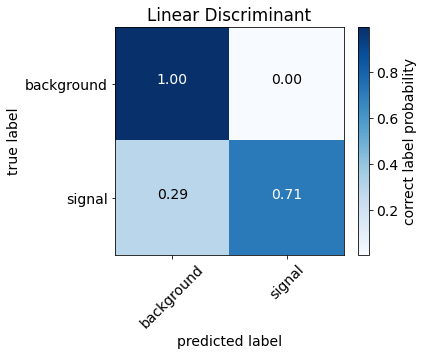

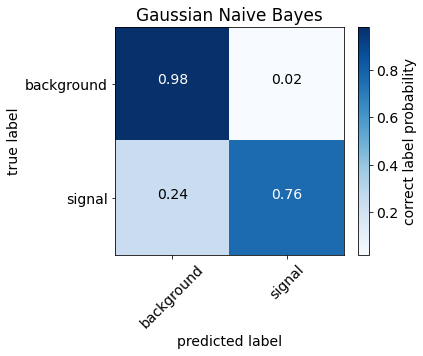

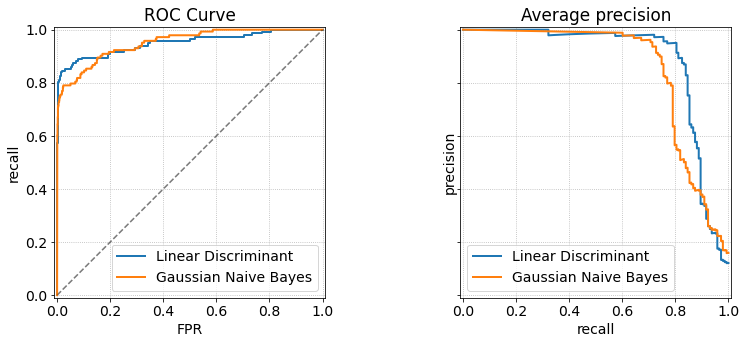

In [8]:
confusionMatrix(X_train, X_validation, Y_train, Y_validation)
ROC_Prec_Curve(X_train, X_validation, Y_train, Y_validation)

## b)

In [9]:
fileName_b = 'HW08Data.txt'
data_b = np.genfromtxt(fileName_b)

In [10]:
data = data_b[1:,:4]
target = data_b[1:,8]

X = data
Y = target

In [11]:
validation_size = 0.4
seed = 7

X_train, X_validation, Y_train, Y_validation = \
    model_selection.train_test_split(X, Y, 
                                     test_size=validation_size, 
                                     random_state=seed)

In [12]:
# Test options and evaluation metric; in our case, accuracy.
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
#models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant', LinearDiscriminantAnalysis()))
#models.append(('K Nearest Neighbors', KNeighborsClassifier()))
#models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Gaussian Naive Bayes', GaussianNB()))
#models.append(('Support Vector Machine', SVC()))

# evaluate each model in turn.
# Preprocess the training data first. See
# https://scikit-learn.org/stable/modules/preprocessing.html
X_scaled = preprocessing.scale(X_train)

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_scaled, Y_train,
                                                 cv=kfold, 
                                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Linear Discriminant: 0.972900 (0.003594)
Gaussian Naive Bayes: 0.962283 (0.003638)


Linear Discriminant
0.9730409275038413
[[6486   18]
 [ 175  480]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      6504
         1.0       0.96      0.73      0.83       655

    accuracy                           0.97      7159
   macro avg       0.97      0.87      0.91      7159
weighted avg       0.97      0.97      0.97      7159

Gaussian Naive Bayes
0.9652186059505518
[[6370  134]
 [ 115  540]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      6504
         1.0       0.80      0.82      0.81       655

    accuracy                           0.97      7159
   macro avg       0.89      0.90      0.90      7159
weighted avg       0.97      0.97      0.97      7159



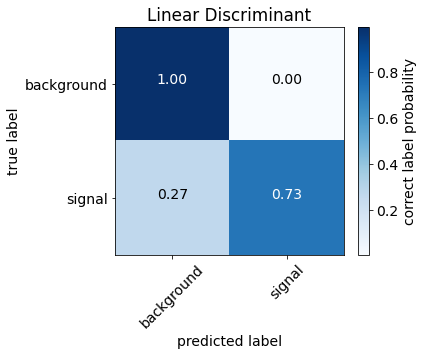

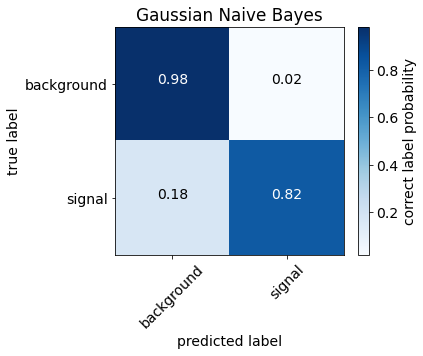

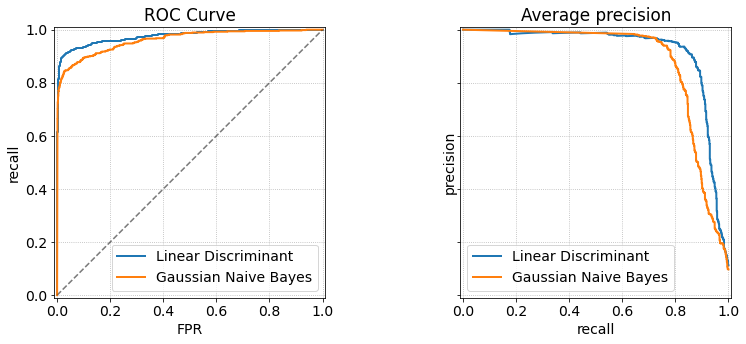

In [13]:
confusionMatrix(X_train, X_validation, Y_train, Y_validation)
ROC_Prec_Curve(X_train, X_validation, Y_train, Y_validation)

### The classifiers do in fact improve in recognizing signal as signal but there is no improvement in classifying background as background. This is evident by the improvement of 0.71 to 0.73 for Linear Discriminant Classifier and 0.76 to 0.82 for Gaussian Naive Bayes Classifier but no improvement for both classifiers when it comes to the upper left score on the confusion matrix. The ROC and Precision curves also show an improvement for larger data set compared to the smaller one in (a)

## c)

In [14]:
data = data_b[1:,:8]
target = data_b[1:,8]

X = data
Y = target

In [15]:
validation_size = 0.4
seed = 7

X_train, X_validation, Y_train, Y_validation = \
    model_selection.train_test_split(X, Y, 
                                     test_size=validation_size, 
                                     random_state=seed)

In [16]:
# Test options and evaluation metric; in our case, accuracy.
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
#models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant', LinearDiscriminantAnalysis()))
#models.append(('K Nearest Neighbors', KNeighborsClassifier()))
#models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Gaussian Naive Bayes', GaussianNB()))
#models.append(('Support Vector Machine', SVC()))

# evaluate each model in turn.
# Preprocess the training data first. See
# https://scikit-learn.org/stable/modules/preprocessing.html
X_scaled = preprocessing.scale(X_train)

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_scaled, Y_train,
                                                 cv=kfold, 
                                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Linear Discriminant: 0.974483 (0.004020)
Gaussian Naive Bayes: 0.944589 (0.007646)


Linear Discriminant
0.9749965078921637
[[6478   26]
 [ 153  502]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6504
         1.0       0.95      0.77      0.85       655

    accuracy                           0.97      7159
   macro avg       0.96      0.88      0.92      7159
weighted avg       0.97      0.97      0.97      7159

Gaussian Naive Bayes
0.9439865903059087
[[6199  305]
 [  96  559]]
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      6504
         1.0       0.65      0.85      0.74       655

    accuracy                           0.94      7159
   macro avg       0.82      0.90      0.85      7159
weighted avg       0.95      0.94      0.95      7159



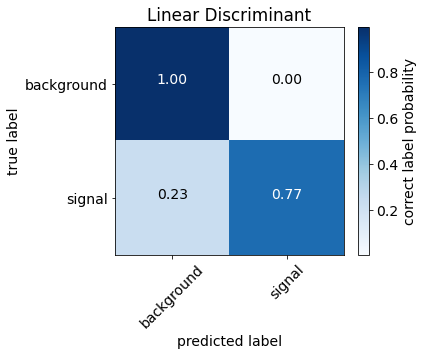

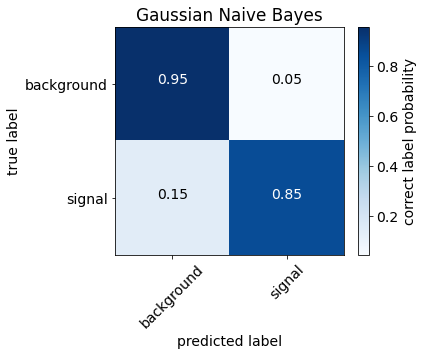

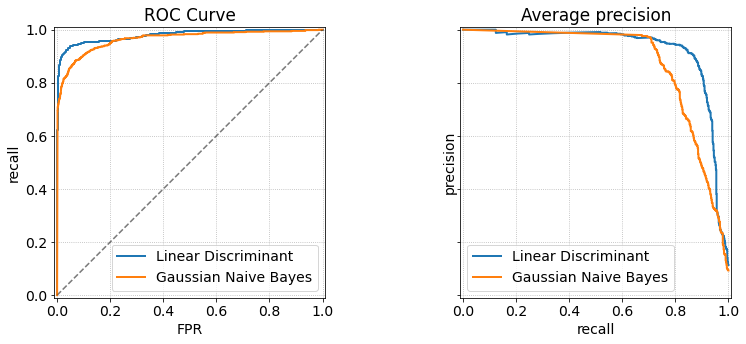

In [17]:
confusionMatrix(X_train, X_validation, Y_train, Y_validation)
ROC_Prec_Curve(X_train, X_validation, Y_train, Y_validation)

### The classifiers improve in recognizing signal as signal yet again but there is no improvement in classifying background as background and in fact the Gaussian Naive Bayes classifier gets worse at classifying background as background evident by the fall of 0.98 to 0.95. The ROC and Precision curves are not a very good indicator in this case however, since, the improvements are minuscle.